In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import Input, Model, layers
#from keras import Model
from keras.layers.core import Dense
from tensorflow.keras.datasets import mnist

In [2]:
# load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training dataset shape: ' + str(x_train.shape))
print('Testing dataset shape: ' + str(x_test.shape))

Training dataset shape: (60000, 28, 28)
Testing dataset shape: (10000, 28, 28)


In [3]:
# normalize all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


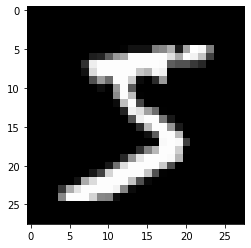

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
# flatten the data to a single vector
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
print('Training dataset shape: ' + str(x_train.shape))
print('Testing dataset shape: ' + str(x_test.shape))

Training dataset shape: (60000, 784)
Testing dataset shape: (10000, 784)


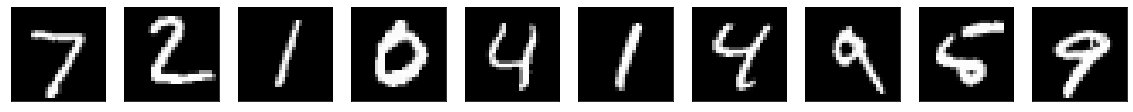

In [6]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  # display the original images
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display the decoded images

Encoder

In [26]:
# the size of our input
original_dim = x_train.shape[1]

# the input placeholder
input_img = Input(shape=(original_dim,), name='input_layer')

hidden_size = 256


# hidden dense layer size 128, relu
h1 = Dense(hidden_size, activation='relu')(input_img)
# encode the input with dense layer size 2, relu
encoded = Dense(2, activation='relu')(h1) #---------------------------------------------

h2 = Dense(hidden_size, activation='relu')(encoded)
output_img = Dense(original_dim, activation='sigmoid')(h2)

In [27]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')

In [28]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 2)                 514       
                                                                 
 dense_14 (Dense)            (None, 256)               768       
                                                                 
 dense_15 (Dense)            (None, 784)               201488    
                                                                 
Total params: 403,730
Trainable params: 403,730
Non-trainable params: 0
_________________________________________________________________


In [29]:
autoencoder.fit(x_train, x_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0556


In [30]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


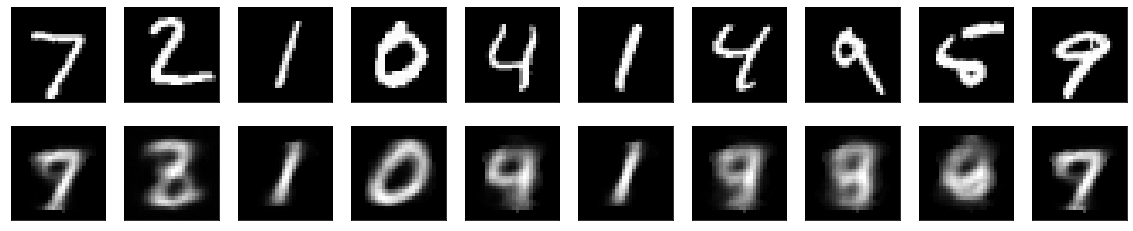

In [31]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  # display the original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display the decoded images
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructed[i].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:



# decoder
latent_inputs = Input(shape=(2,), name='latent_input')
# hidden dense layer of size 128
#h = ?
# hidden dense layer of size 256
h2 = Dense(128, activation='sigmoid')(flattened) #-----------------------------------
# output layer, dense layer of size original_dim, sigmoid activation function
outputs = Dense(original_dim, activation='sigmoid')(h2) #-----------------------------

# instantiate encoder model
deepAE_encoder = Model(input_img, encoded, name='encoder')

# instantiate decoder model
deepAE_decoder = Model(latent_inputs, outputs, name='decoder')

# instantiate deep AE model
outputs = deepAE_decoder(deepAE_encoder(input_img))
deepAE = Model(input_img, outputs, name='deep_ae')


deepAE.compile(optimizer='adam', loss='mse')

deepAE.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True,
           validation_data=(x_test, x_test))

encoded_imgs = deepAE_encoder.predict(x_test, batch_size=128)
decoded_imgs = deepAE_decoder.predict(encoded_imgs)



In [ ]:
original_dim = x_train.shape[1]

input_img = Input(shape=(original_dim,), name='input_layer')

h = Dense(128, activation='relu')(input_img)

encoded = Dense(2, activation='relu')(h)

latent_inputs = Input(shape=(2,), 'latent_inputs')
